In [9]:
import Reversed_Reversi_MCT
import Reversed_Reversi_NN
import Reversed_Reversi_MCT_raw
import numpy as np
from Reversed_Reversi_MCT import terminal, get_result
from matplotlib import pyplot as plt

In [2]:
chessboard = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, 1, 0, 0, 0],
    [0, 0, 0, 1, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
])

In [3]:
def get_AI(arg):
    if arg == 'MCT':
        return Reversed_Reversi_MCT.AI(
            8, Reversed_Reversi_MCT.COLOR_BLACK, 1), Reversed_Reversi_MCT.AI(
            8, Reversed_Reversi_MCT.COLOR_WHITE, 1)
    elif arg == 'RAW_MCT':
        return Reversed_Reversi_MCT_raw.AI(
            8, Reversed_Reversi_MCT.COLOR_BLACK, 1), Reversed_Reversi_MCT_raw.AI(
            8, Reversed_Reversi_MCT.COLOR_WHITE, 1)
    else:
        return Reversed_Reversi_NN.AI(
            8, Reversed_Reversi_MCT.COLOR_BLACK, 1), Reversed_Reversi_NN.AI(
            8, Reversed_Reversi_MCT.COLOR_WHITE, 1)

In [4]:
def play(player_black, player_white):
    loop1, loop2 = [], []
    board = chessboard.copy()
    while not terminal(board=board):
        board, loop = player_black.next(board)
        loop1.append(loop)
        if terminal(board):
            break
        board, loop = player_white.next(board)
        loop2.append(loop)
    return get_result(board, -1), loop1, loop2

In [5]:
def test(algorithm1, algorithm2):
    player1_black, player1_white = get_AI(algorithm1)
    player2_black, player2_white = get_AI(algorithm2)
    result, loop1_b, loop2_w = play(player1_black, player2_white)
    result, loop2_b, loop1_w = play(player2_black, player1_white)
    return loop1_b, loop1_w, loop2_b, loop2_w

In [7]:
loop_b_MCT, loop_w_MCT, loop_b_RAW, loop_w_RAW = test('MCT', 'RAW_MCT')

In [8]:
loop_b_NN, loop_w_NN, loop_b_RAW, loop_w_RAW = test('NN', 'RAW_MCT')

In [13]:
print(len(loop_b_NN))
print(len(loop_w_NN))

22
20


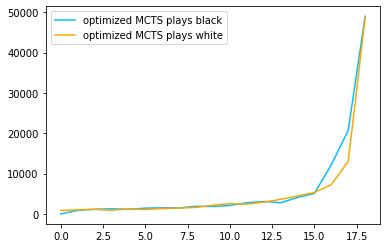

In [22]:
plt.plot(range(len(loop_b_MCT)), loop_b_MCT, color = 'deepskyblue', label = 'optimized MCTS plays black')
plt.plot(range(len(loop_w_MCT)), loop_w_MCT, color = 'orange', label = 'optimized MCTS plays white')
plt.legend()
plt.savefig('optimized_MCTS.svg',dpi=600,format='svg')
plt.show()

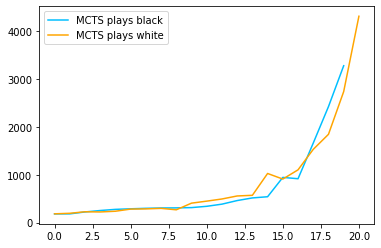

In [23]:
plt.plot(range(len(loop_b_RAW)), loop_b_RAW, color = 'deepskyblue', label = 'MCTS plays black')
plt.plot(range(len(loop_w_RAW)), loop_w_RAW, color = 'orange', label = 'MCTS plays white')
plt.legend()
plt.savefig('MCTS.svg',dpi=600,format='svg')
plt.show()

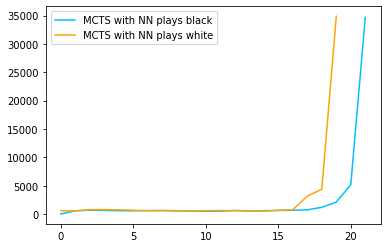

In [24]:
plt.plot(range(len(loop_b_NN)), loop_b_NN, color = 'deepskyblue', label = 'MCTS with NN plays black')
plt.plot(range(len(loop_w_NN)), loop_w_NN, color = 'orange', label = 'MCTS with NN plays white')
plt.legend()
plt.savefig('MCTS_NN.svg',dpi=600,format='svg')
plt.show()